# Analysis of MTA NYCT Safety Data

### Prepared by Hrithik Shukla

### Dataset Details

**Name: MTA NYCT Safety Data: Beginning 2019**

This dataset provides insights into safety-related incidents and indicators within the New York City Transit (NYCT). NYCT is responsible for overseeing the safety of subway and bus operations, aiming to ensure the well-being of both employees and passengers. This dataset offers information about various safety aspects, including incidents, collisions, and accident prevention indicators within the NYCT system.

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset Description

# Define the data as a list of lists
data = [
    ["Month", "DATE/TIME", "Represents the time period in which the safety metric is being calculated."],
    ["Department", "STRING", "Represents the two departments that are part of New York City Transit: Bus and Subway."],
    ["Metric", "STRING", "The type of safety performance indicator."],
    ["Value", "FLOAT", "The numeric value for the indicator."]
]

# Create a DataFrame
desc = pd.DataFrame(data, columns=["Data Label", "Type", "Data Description"])

# Display the DataFrame as a table in Jupyter Notebook
desc

,Data Label,Type,Data Description
0,Month,DATE/TIME,Represents the time period in which the safety...
1,Department,STRING,Represents the two departments that are part o...
2,Metric,STRING,The type of safety performance indicator.
3,Value,FLOAT,The numeric value for the indicator.


In [3]:
# Importing the Dataset as a Pandas DataFrame
df = pd.read_csv('MTA_NYCT_Safety_Data__Beginning_2019.csv')

In [4]:
# Examining the DataFrame
df

,Month,Department,Metric,Value
0,04/01/2019,Bus,Bus Collision Per Million Miles,53.040
1,04/01/2019,Bus,Bus Collision Injuries Per Million Miles,3.760
2,04/01/2019,Bus,Bus Customer Accidents per million customers,1.480
3,04/01/2019,Subway,Subway Customer Accidents,2.800
4,04/01/2019,Subway,Subway Fires,57.000
...,...,...,...,...
463,01/01/2024,Subway,Subway Fires,75.000
464,01/01/2024,Subway,Joint Track Safety Audits - Actual Count,28.000
465,01/01/2024,Subway,Joint Track Safety Audits - Compliance Rate,0.988
466,01/01/2024,Subway,Continuous Welded Rail Initiative (# Track Feet),1560.000


In [5]:
# Examining the Unique Values in the Metric Column

metrics = list(df['Metric'].unique())

In [6]:
# Examining the list of metrics

metrics

['Bus Collision Per Million Miles',
 'Bus Collision Injuries Per Million Miles',
 'Bus Customer Accidents per million customers',
 'Subway Customer Accidents',
 'Subway Fires',
 'Audible Pedestrian Turn Warning System',
 'Vision Zero Employee Training',
 'Joint Track Safety Audits - Actual Count',
 'Joint Track Safety Audits - Compliance Rate',
 'Continuous Welded Rail Initiative (# Track Feet)',
 'Friction Pad Installation']

In [7]:
# Create a dictionary to hold each metric DataFrame
metric_dfs = {}

for metric in metrics:
    metric_dfs[metric] = df[df['Metric'] == metric]

#### Now metric_dfs dictionary contains each metric DataFrame. Access them like this: metric_dfs['Bus Collision Per Million Miles']

### Bus Collision Per Million Miles

##### The metric "Bus Collision Per Million Miles" and its associated values, which are in decimal format, represent a rate or frequency of bus collisions per million miles traveled.

In [8]:
# Analyzing Bus Collision Per Million Miles

df1 = metric_dfs['Bus Collision Per Million Miles']

df1.head()

,Month,Department,Metric,Value
0,04/01/2019,Bus,Bus Collision Per Million Miles,53.04
5,05/01/2019,Bus,Bus Collision Per Million Miles,57.92
10,06/01/2019,Bus,Bus Collision Per Million Miles,60.88
15,07/01/2019,Bus,Bus Collision Per Million Miles,51.79
20,08/01/2019,Bus,Bus Collision Per Million Miles,48.87


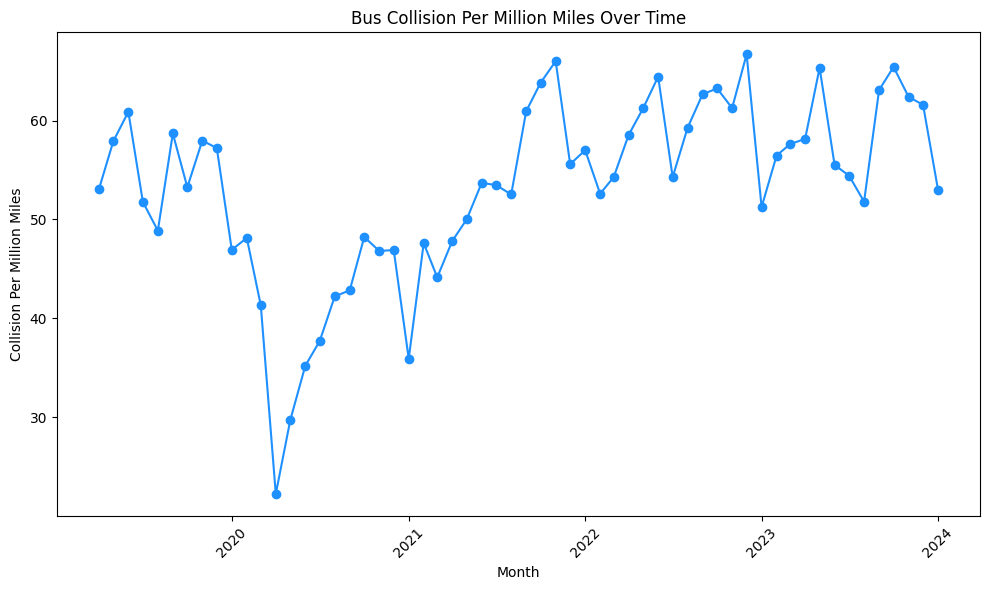

In [9]:
# Convert 'Month' to datetime format for better plotting
df1 = df1.copy()
df1['Month'] = pd.to_datetime(df1['Month'])

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plotting the line chart
plt.plot(df1['Month'], df1['Value'], marker='o', linestyle='-', color='dodgerblue')

# Adding title and labels
plt.title('Bus Collision Per Million Miles Over Time')
plt.xlabel('Month')
plt.ylabel('Collision Per Million Miles')

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

Collisions Per Million Miles **declined significantly in 2020, which could be owing to the global pandemic**. However, display a general upward trend since 2020. A more granular analysis by month and year shall reveal additional details and allow us to study these trends more meaningfully. 

### Analysis Per Month and Year

In [10]:
# Calculating Average Collisions
df1 =df1.copy()

# Extract year from 'Month' column using .iloc
df1['Year'] = df1['Month'].apply(lambda x: x.year)
df1['Month_No.'] = df1['Month'].apply(lambda x: x.month)
average_collisions = df1.groupby(['Year', 'Month', 'Month_No.'])['Value'].mean().reset_index()

In [11]:
# Sorting the values in a chronological order

average_collisions.sort_values(by=['Year', 'Month_No.'], inplace=True)

In [12]:
# Mapping month numbers to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

In [13]:
# Apply the mapping to the 'Month' column to create a new 'Month_Name' column
average_collisions['Month_Name'] = average_collisions['Month_No.'].map(month_mapping)

# Reordering columns for better readability
avg_by_month = average_collisions[['Month', 'Month_Name', 'Month_No.', 'Value']]

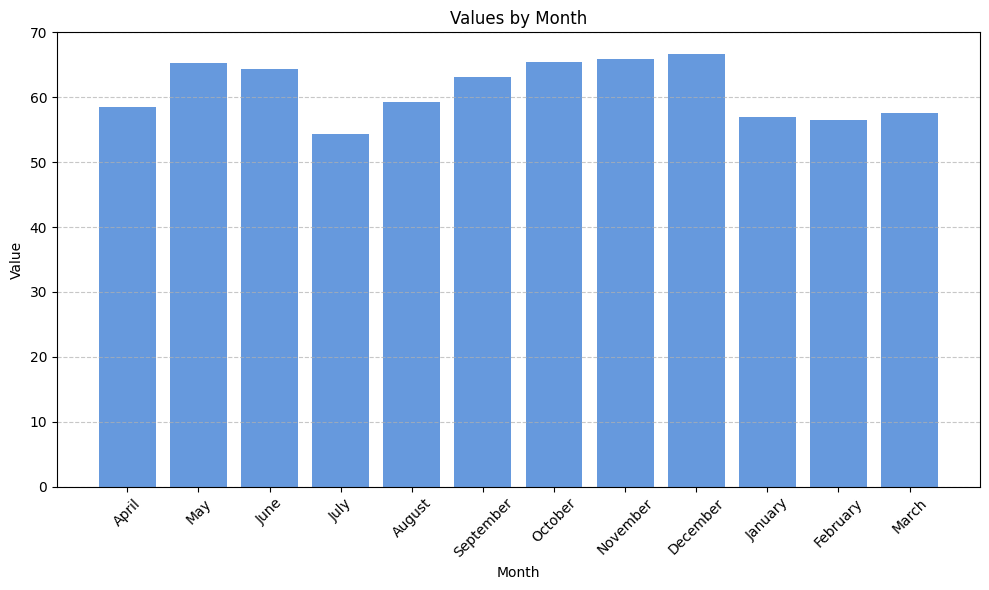

In [14]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_by_month['Month_Name'], avg_by_month['Value'], color='#69d')
plt.title('Values by Month')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analysis:**

**Higher Collision Rates in Fall and Early Winter:** The highest average collision rates occur in October and November, with values of 58.7940 and 58.8880, respectively, followed by December and September. This pattern may suggest that factors associated with these months, such as weather changes, increased traffic due to school sessions, or holiday-related activity, could contribute to higher collision rates.

**Lower Collision Rates in Spring:** The months of April and January show the lowest average collision rates, with values of 47.9620 and 48.8220, respectively. This could indicate better driving conditions, less traffic, or other factors that contribute to a decrease in bus collisions.

**Moderate Rates in Summer:** June shows a relatively high average compared to other months, indicating a possible increase in collisions during the early summer. However, July and August have moderate rates, suggesting a stabilization or improvement in driving conditions or operational practices during mid to late summer.

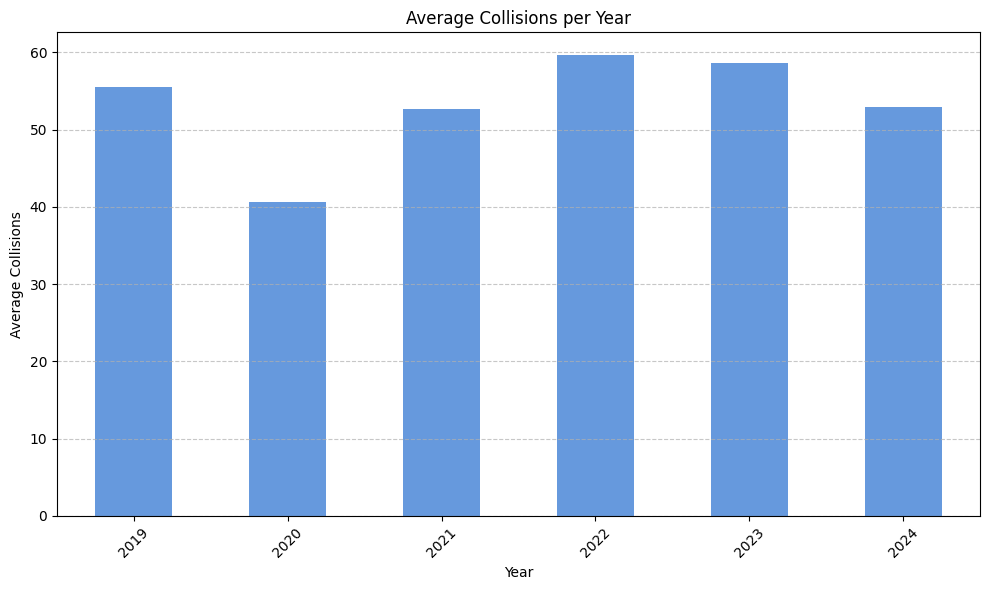

In [15]:
# Calculate the average per year
average_per_year = average_collisions.groupby('Year')['Value'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
average_per_year.plot(kind='bar', color='#69d')
plt.title('Average Collisions per Year')
plt.xlabel('Year')
plt.ylabel('Average Collisions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analysis:**

**2019:** The year started with an average collision rate of 55.52 per million miles, which suggests a moderate level of incidents relative to miles traveled. This could serve as a baseline for evaluating the effectiveness of subsequent safety measures and policies.

**2020:** There was a significant decrease in the average collision rate to 40.70, which could be attributed to various factors, such as reduced traffic and fewer miles driven due to the global pandemic. This year stands out as having the lowest collision rate, likely influenced by extraordinary external conditions.

**2021:** As conditions began to normalize, the collision rate increased to 52.63, approaching pre-pandemic levels. This increase might reflect a return to regular operational volumes and possibly the challenges of readjusting to normal traffic conditions after a year of anomalies.

**2022:** The trend continued upwards to 59.63, indicating not only a return to pre-pandemic operational levels but also an increase in collisions per million miles. This year marks the highest rate in the observed period, suggesting the need for a reevaluation of current safety measures and potentially indicating increased operational risk.

**2023:** The average collision rate slightly decreased to 58.58, indicating a slight improvement over 2022 but still remaining higher than any year prior to 2022. This suggests that while there may have been efforts to address the rise in collision rates, further actions or time might be needed to see significant improvements.

### Bus Collision Injuries Per Million Miles

The metric "Bus Collision Injuries Per Million Miles" measures the number of injuries resulting from bus collisions relative to every million miles traveled by buses. 

In [16]:
# Bus Collision Injuries Per Million Miles

df2 = metric_dfs['Bus Collision Injuries Per Million Miles']

df2.head()

,Month,Department,Metric,Value
1,04/01/2019,Bus,Bus Collision Injuries Per Million Miles,3.76
6,05/01/2019,Bus,Bus Collision Injuries Per Million Miles,7.61
11,06/01/2019,Bus,Bus Collision Injuries Per Million Miles,8.04
16,07/01/2019,Bus,Bus Collision Injuries Per Million Miles,6.35
21,08/01/2019,Bus,Bus Collision Injuries Per Million Miles,6.15


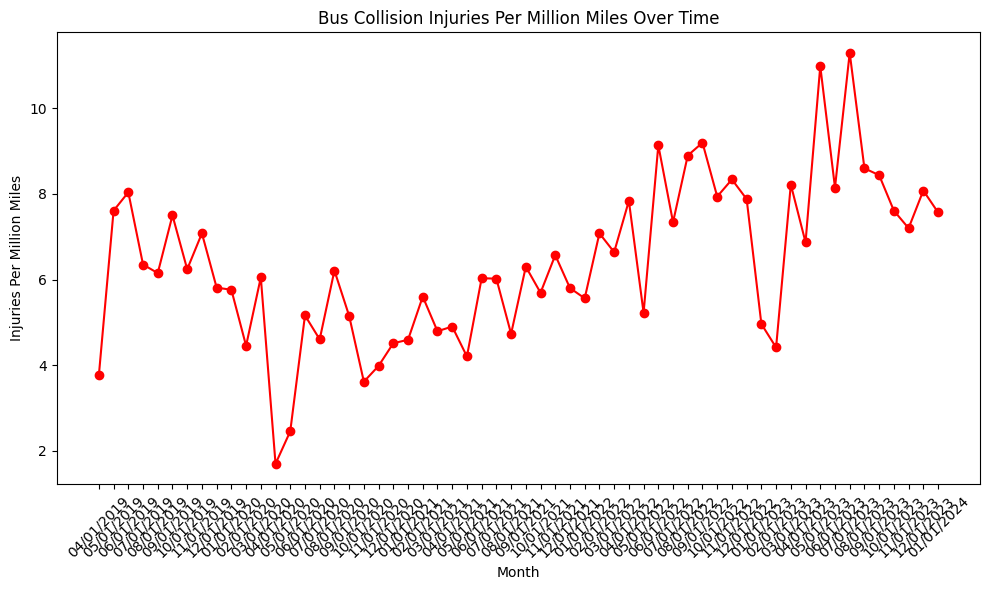

In [17]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plotting the line chart for df2
plt.plot(df2['Month'], df2['Value'], marker='o', linestyle='-', color='r')  # Changed color to red for distinction

# Adding title and labels
plt.title('Bus Collision Injuries Per Million Miles Over Time')
plt.xlabel('Month')
plt.ylabel('Injuries Per Million Miles')

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

The time series chart of "Bus Collision Injuries Per Million Miles" **indicates variability in the rate of injuries over time, with noticeable peaks suggesting periods of increased incidents or severity**. Particularly, the latter years show an uptrend in injuries, highlighting potential areas for safety improvements or further investigation into the causes behind these increases.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/899161785.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Reds_r')


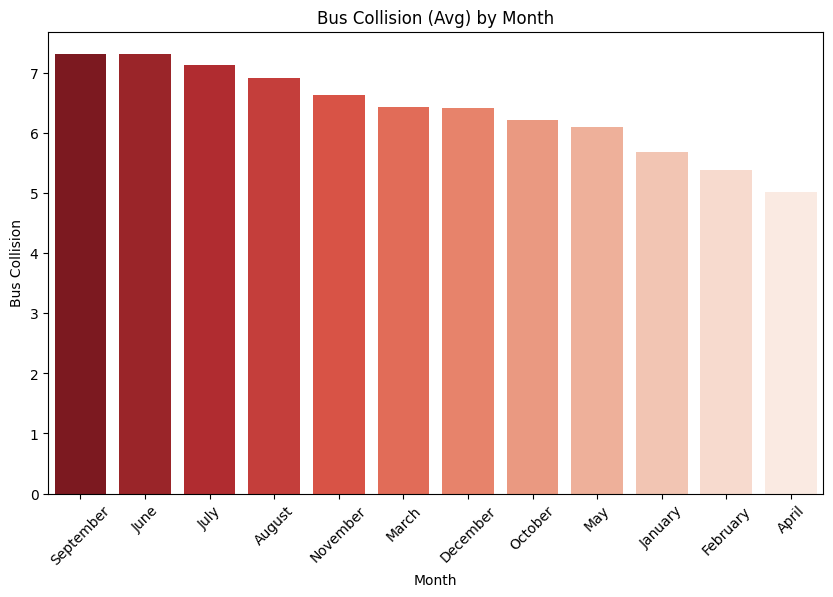

In [18]:
# Assuming 'Month' is already in datetime format and 'df2' is your DataFrame
df2 = df2.copy()
df2['Month'] = pd.to_datetime(df2['Month'])
df2['Month_Name'] = df2['Month'].dt.month_name()  # Extracting month names

# Grouping by 'Month_Name' in df2 and calculating the average
monthly_avg = df2.groupby('Month_Name')['Value'].mean().reset_index()

# Sorting monthly_avg in descending order by 'Value'
monthly_avg = monthly_avg.sort_values('Value', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Reds_r')
plt.title('Bus Collision (Avg) by Month')
plt.xlabel('Month')
plt.ylabel('Bus Collision')
plt.xticks(rotation=45)  # Rotating for better readability
plt.show()

**Analysis:**
  
The months with the highest average values are June (7.304), September (7.318), and July (7.122), indicating that these **summer to early autumn months may have conditions or factors leading to higher metric values**. This could be attributed to increased travel activity, more congested roads, or varying weather conditions during these times.

Conversely, the months with the lowest average values are April (5.012) and February (5.385), suggesting that early spring and late winter months experience conditions that result in lower metric values.
August shows a significant increase in the average value (6.918), indicating a peak during the late summer period.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/3342048050.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Reds')  # Using reversed Reds palette for visual consistency


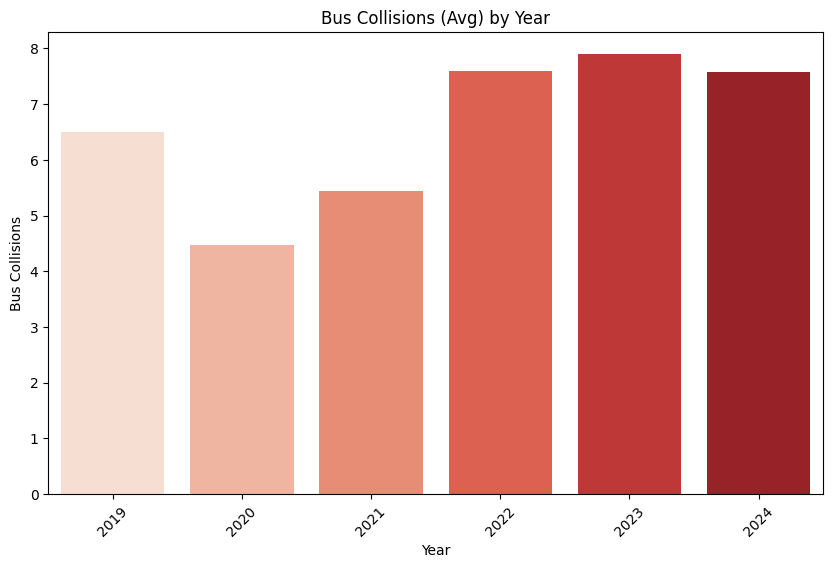

In [19]:
# Plotting the same metric by year
df2 = df2.copy()
df2['Year'] = df2['Month'].dt.year  # Extracting year

# Grouping by 'Year' in df2 and calculating the average
yearly_avg = df2.groupby('Year')['Value'].mean().reset_index()

# Sorting yearly_avg in descending order by 'Value'
yearly_avg = yearly_avg.sort_values('Value', ascending=False)  

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Reds')  # Using reversed Reds palette for visual consistency
plt.title('Bus Collisions (Avg) by Year')
plt.xlabel('Year')
plt.ylabel('Bus Collisions')
plt.xticks(rotation=45)  # Rotating for better readability
plt.show()

**Analysis:**

The yearly data for "Bus Collision Injuries Per Million Miles" reveals a notable trend of increasing injury rates over time. Starting from the lowest average in 2020 at 4.47, which could potentially be attributed to reduced traffic and travel restrictions during the global pandemic, there is a steady rise in the subsequent years. The year 2021 sees a slight increase to 5.44, followed by a more significant jump in 2022 to 7.59, and peaking in 2023 with the highest injury rate of 7.90. 

This upward trend may reflect a return to pre-pandemic operational levels, increased road congestion, or possibly evolving reporting mechanisms or safety standards. The data underscores the need for continued and enhanced safety measures and interventions to counteract this increasing trend of bus collision injuries.

### Bus Customer Accidents per million customers

This metric measures the frequency of accidents involving bus customers, normalized per million customers served, to provide a standardized rate of such incidents irrespective of total ridership levels.

In [20]:
# Bus Customer Accidents per million customers

df3 = metric_dfs['Bus Customer Accidents per million customers']

df3.head()

,Month,Department,Metric,Value
2,04/01/2019,Bus,Bus Customer Accidents per million customers,1.48
7,05/01/2019,Bus,Bus Customer Accidents per million customers,1.57
12,06/01/2019,Bus,Bus Customer Accidents per million customers,1.44
17,07/01/2019,Bus,Bus Customer Accidents per million customers,1.65
22,08/01/2019,Bus,Bus Customer Accidents per million customers,1.81


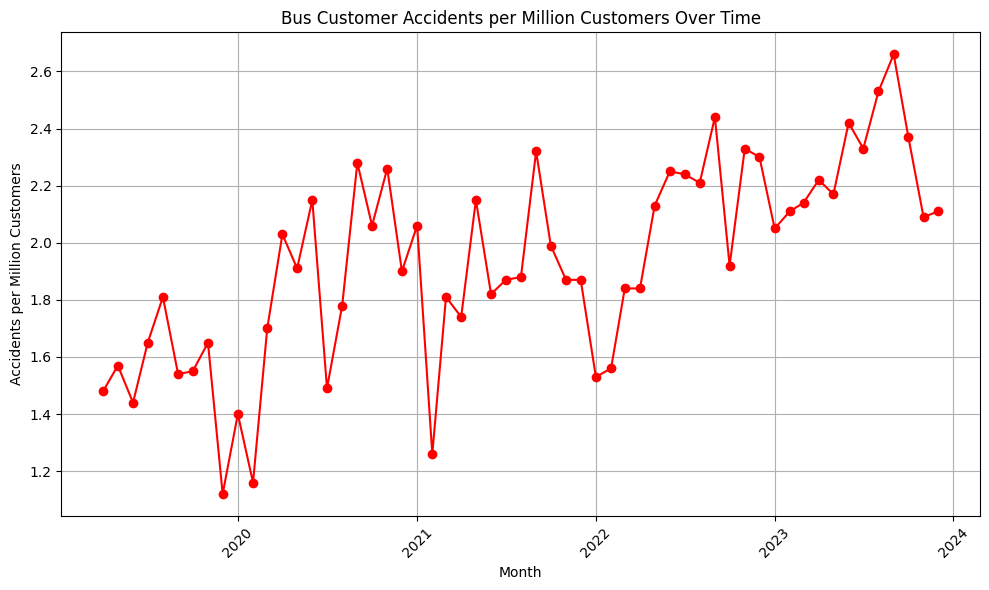

In [21]:
# Convert 'Month' column to datetime format
df3 = df3.copy()
df3['Month'] = pd.to_datetime(df3['Month'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df3['Month'], df3['Value'], marker='o', linestyle='-', color='red')
plt.title('Bus Customer Accidents per Million Customers Over Time')
plt.xlabel('Month')
plt.ylabel('Accidents per Million Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis:** 

The dataset on "Bus Customer Accidents per million customers" indicates a clear trend over the observed years, from 2019 through 2023. Initially, in 2019, accident rates per million customers start at relatively lower values, fluctuating around the 1.5 to 1.8 mark, with the notable exception of August showing a peak at 1.81. This suggests a moderate level of incidents involving bus customers early in the observed period.

As we move into 2020, a **significant uptrend** in accident rates is noticeable, particularly starting from April (2.03), **reflecting an increase in the frequency or severity of accidents per million customers**. This trend of elevated values continues into 2021, 2022, and 2023, with numbers consistently hovering above 2.0 for many months. Notably, September 2023 marks the highest recorded accident rate at 2.66, underscoring a progressive increase over the years.

This overall trend of rising accident rates could point to various underlying factors, such as increased ridership leading to more incidents, changes in reporting practices, or potentially deteriorating safety conditions. The peak values observed in the latter part of each year, particularly in the summer to autumn months, might indicate seasonal factors that affect accident rates, such as increased travel or changes in weather conditions affecting safety.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/1110583099.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Reds')


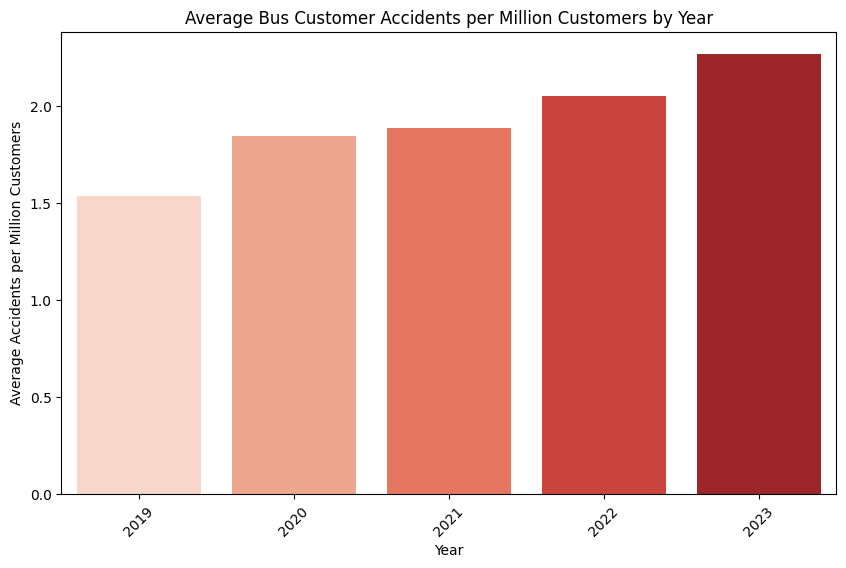

In [22]:
# Extracting year from 'Month' and calculating the average 'Value' by year
df3['Year'] = df3['Month'].dt.year
yearly_avg = df3.groupby('Year')['Value'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Reds')
plt.title('Average Bus Customer Accidents per Million Customers by Year')
plt.xlabel('Year')
plt.ylabel('Average Accidents per Million Customers')
plt.xticks(rotation=45)
plt.show()

**Analysis:**

It is surprising to note an increase in 2020 despite restrictions due to the global pandemic. As outlined earlier, the consistent year-over-year increase might suggest underlying factors that progressively impact bus customer safety, such as changes in bus operations, increased ridership leading to congestion, or possibly evolving external conditions like traffic patterns.

The data underscores a growing concern for bus customer safety, highlighting the importance of investigating the causes behind the increasing accident rates. It suggests a need for transport departments or companies to evaluate and enhance their safety measures, conduct detailed analyses to identify specific risk factors, and implement targeted interventions aimed at reducing customer accidents.

### Subway Customer Accidents

"Subway Customer Accidents" would specifically relate to incidents involving subway passengers, tracking the number or rate of such accidents within a given timeframe.

In [23]:
# Subway Customer Accidents

df4 = metric_dfs['Subway Customer Accidents']

df4.head()

,Month,Department,Metric,Value
3,04/01/2019,Subway,Subway Customer Accidents,2.80
8,05/01/2019,Subway,Subway Customer Accidents,2.81
13,06/01/2019,Subway,Subway Customer Accidents,2.98
18,07/01/2019,Subway,Subway Customer Accidents,2.50
23,08/01/2019,Subway,Subway Customer Accidents,2.55


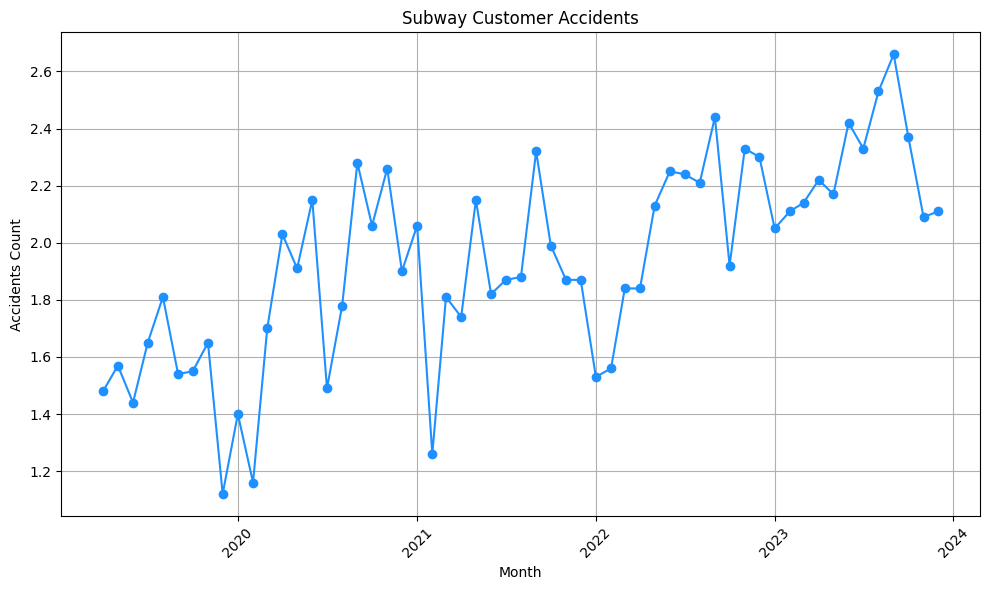

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/216073055.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Blues_r')


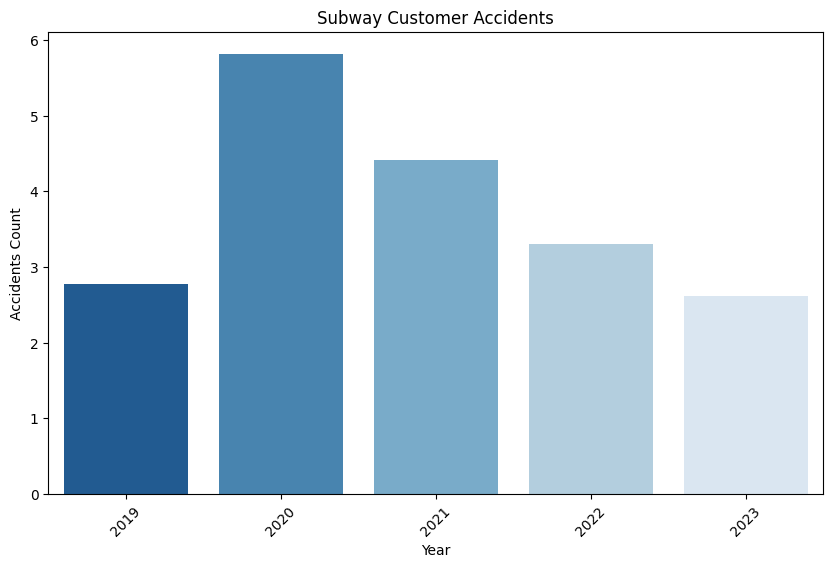

In [24]:
# Convert 'Month' column to datetime format
df4 = df4.copy()
df4['Month'] = pd.to_datetime(df4['Month'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df3['Month'], df3['Value'], marker='o', linestyle='-', color='dodgerblue')
plt.title('Subway Customer Accidents')
plt.xlabel('Month')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Extracting year from 'Month' and calculating the average 'Value' by year
df4['Year'] = df4['Month'].dt.year
yearly_avg = df4.groupby('Year')['Value'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Blues_r')
plt.title('Subway Customer Accidents')
plt.xlabel('Year')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.show()

**Analysis:**

**Trend Analysis:** The overall trend appears to fluctuate, with a notable spike in April 2020. This could be attributed to various factors, including changes in subway usage, operational changes, or external events affecting passenger safety.

**Significant Spikes: The significant spike in April 2020, where accidents jumped to 13.63, stands out distinctly. This period coincides with the early months of the COVID-19 pandemic, which could have led to unusual patterns in subway usage or operational challenges impacting safety.**

**Gradual Increase in Recent Years:** Excluding the spike in 2020, there's a noticeable trend of gradual increase in accidents from 2021 onwards, reaching a peak in January 2022 before showing some signs of decrease. This could indicate evolving factors affecting subway safety that merit closer examination.

**Potential for Safety Improvements:** The data points to areas and times where safety initiatives could be most effectively targeted. For instance, reinforcing safety campaigns during periods prone to higher accident rates or addressing specific safety challenges highlighted by the data.

### Subway Fires

Counts the incidents of fires occurring within the subway system.

In [25]:
# Subway Fires

df5 = metric_dfs['Subway Fires']

df5.head()

,Month,Department,Metric,Value
4,04/01/2019,Subway,Subway Fires,57.0
9,05/01/2019,Subway,Subway Fires,50.0
14,06/01/2019,Subway,Subway Fires,43.0
19,07/01/2019,Subway,Subway Fires,59.0
24,08/01/2019,Subway,Subway Fires,55.0


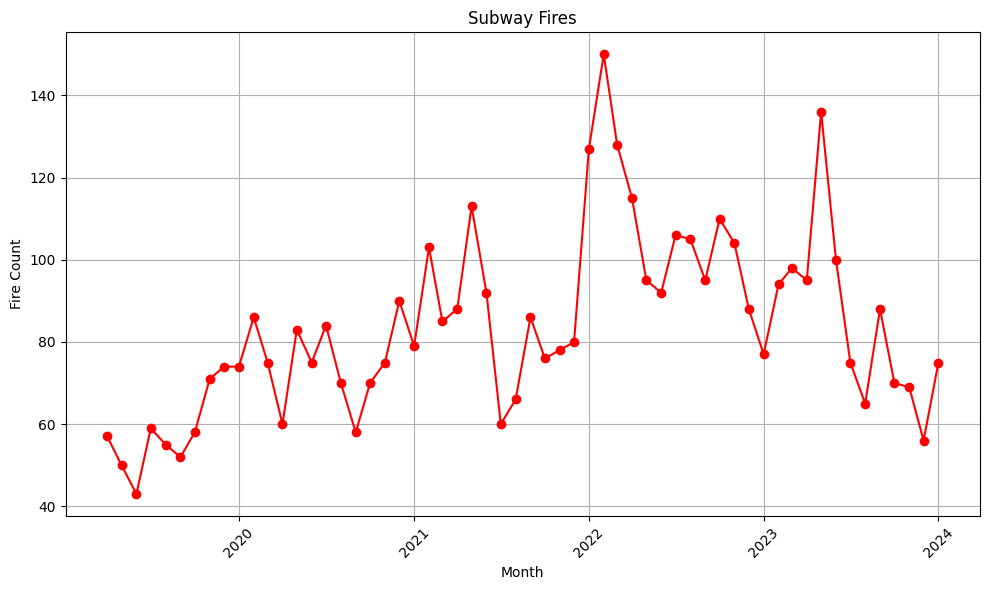

In [26]:
# Convert 'Month' column to datetime format
df5 = df5.copy()
df5['Month'] = pd.to_datetime(df5['Month'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df5['Month'], df5['Value'], marker='o', linestyle='-', color='red')
plt.title('Subway Fires')
plt.xlabel('Month')
plt.ylabel('Fire Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis:**

The data begins with 57 fires in April 2019 and shows variability throughout the period, with a noticeable peak of 150 fires in February 2022. This peak represents the highest number of fires recorded in a single month throughout the dataset.
Following this peak, there's a general trend of fluctuation but with a notable decrease towards the end of 2023 and into January 2024, where the number of fires dropped to 75.

The "Subway Fires" data indicates that while there are periods of increase, particularly noted in early 2022, there appears to be a general trend of managing and potentially reducing the number of fires towards the latter part of the dataset. Continuous efforts in maintenance, safety protocols, and system upgrades could be contributing to these observed changes. Further analysis would be beneficial to understand the specific causes of these fires and the effectiveness of measures taken to prevent them.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/3390984272.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Reds_r')


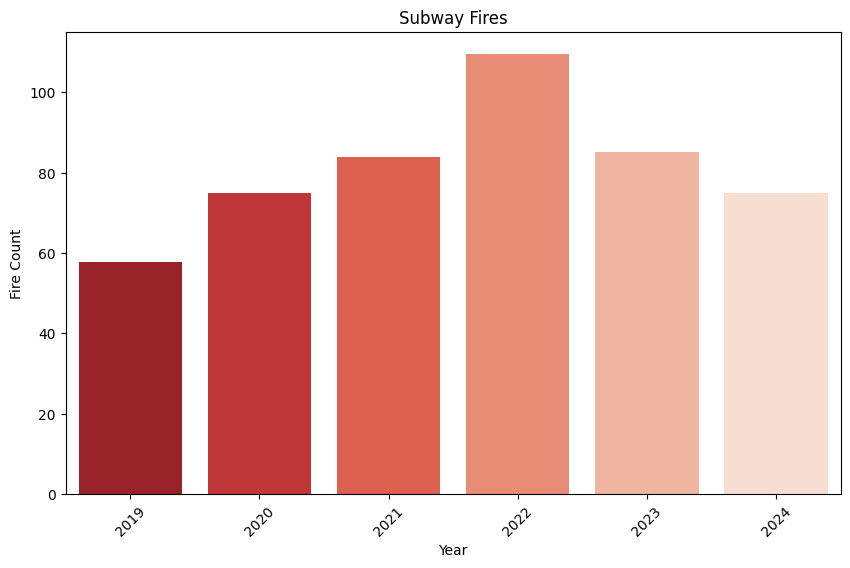

In [27]:
# Extracting year from 'Month' and calculating the average 'Value' by year
df5['Year'] = df5['Month'].dt.year
yearly_avg = df5.groupby('Year')['Value'].mean().reset_index()

# Plotting the bar chart - Yearly
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Reds_r')
plt.title('Subway Fires')
plt.xlabel('Year')
plt.ylabel('Fire Count')
plt.xticks(rotation=45)
plt.show()

**Analysis:**

2019: The year starts with an average of approximately 57.67 fires per month, indicating a relatively lower frequency of incidents at the beginning of the observed period.
2020: An increase to an average of 75 fires per month, suggesting a notable rise in subway fire incidents compared to the previous year.
2021: The average further increases to 83.83, indicating a continued upward trend in the frequency of subway fires.
2022: This year marks the peak in the dataset with an average of 109.58 fires per month, highlighting the most challenging year for subway fire incidents within the observed period.
2023: There is a decrease to an average of 85.25 fires per month, suggesting an improvement or mitigation in the number of subway fires compared to the peak in 2022.

**Insights:**
The data indicates an overall increasing trend in subway fire incidents from 2019 to the peak in 2022, followed by a noticeable decrease in 2023. This trend could reflect various factors, including changes in subway operations, maintenance practices, or the introduction of new safety measures.
The decrease in 2023, while still higher than the 2019 and 2020 averages, could suggest that interventions implemented after the peak in 2022 are beginning to have a positive impact. However, the average number of fires in 2023 still remains higher than the initial years, indicating that while progress may have been made, the issue continues to require attention and action to further reduce the frequency of such incidents.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/2680789195.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Reds_r')


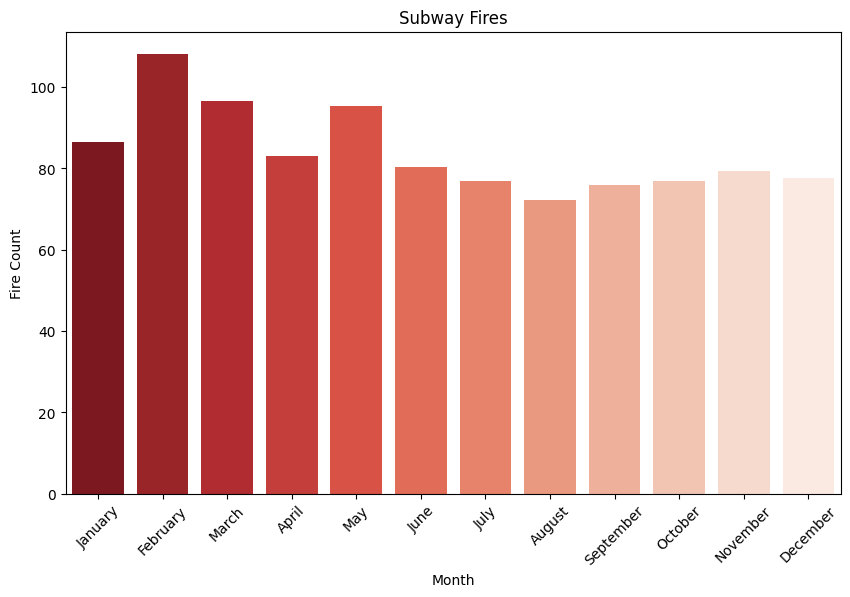

In [28]:
# Extracting year from 'Month' and calculating the average 'Value' by month
df5['Month#'] = df5['Month'].dt.month
monthly_avg = df5.groupby('Month#')['Value'].mean().reset_index()

# Apply the mapping to the 'Month' column to create a new 'Month_Name' column
monthly_avg['Month_Name'] = monthly_avg['Month#'].map(month_mapping)

# Plotting the bar chart - Monthly
plt.figure(figsize=(10, 6))
sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Reds_r')
plt.title('Subway Fires')
plt.xlabel('Month')
plt.ylabel('Fire Count')
plt.xticks(rotation=45)
plt.show()

**Analysis:**

**Winter Months (January, February):** Higher averages, particularly in February (108.25), suggest increased risk during colder months, possibly due to increased use of heating elements or electrical issues in colder weather.

**Spring to Early Summer (March to June):** There's a noticeable decrease, with June having the lowest average (80.4), which might indicate fewer operational risks or better management during these months.

**Midsummer to Early Fall (July to September):** The averages slightly decrease further in July (76.8) and then gradually increase through September (75.8), suggesting a variable risk during these months.

**Late Fall to Winter (October to December):** A slight uptick in October (76.8) followed by a minor decrease towards the end of the year, ending with December (77.6), suggests a relatively stable risk level during these months compared to the rest of the year.

### Audible Pedestrian Turn Warning System

Tracks the implementation or usage of systems designed to warn pedestrians of turning vehicles.

In [29]:
# Audible Pedestrian Turn Warning System

df6 = metric_dfs['Audible Pedestrian Turn Warning System']

df6.head()

,Month,Department,Metric,Value
143,08/01/2021,Bus,Audible Pedestrian Turn Warning System,10.0
154,09/01/2021,Bus,Audible Pedestrian Turn Warning System,70.0
165,10/01/2021,Bus,Audible Pedestrian Turn Warning System,31.0
176,11/01/2021,Bus,Audible Pedestrian Turn Warning System,40.0
187,12/01/2021,Bus,Audible Pedestrian Turn Warning System,75.0


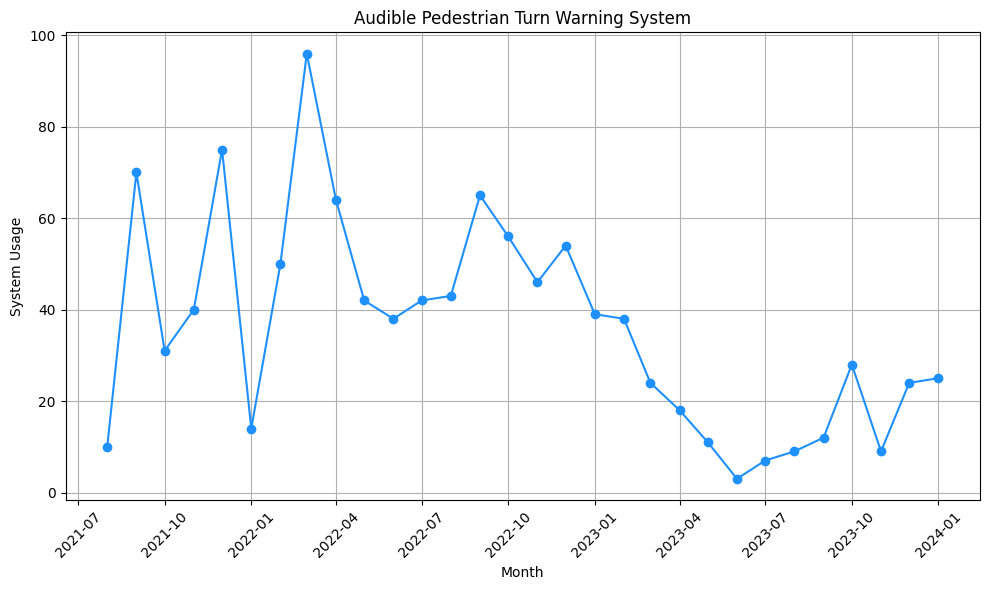

In [30]:
# Convert 'Month' column to datetime format
df6 = df6.copy()
df6['Month'] = pd.to_datetime(df6['Month'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df6['Month'], df6['Value'], marker='o', linestyle='-', color='dodgerblue')
plt.title('Audible Pedestrian Turn Warning System')
plt.xlabel('Month')
plt.ylabel('System Usage')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis:**

The "Audible Pedestrian Turn Warning System" data from August 2021 to January 2024 shows an initial period of variability and peaks, with a notable increase in March 2022 (96 units). This suggests an active phase of installation or implementation efforts. However, **from mid-2023 onwards, there's a sharp decline in the number of systems reported**, reaching a low in June 2023 (3 units), followed by a slight increase towards the end of 2023 and into January 2024. This trend may reflect the completion of major installation phases or shifts in prioritization within the bus safety initiatives. Overall, the data indicates a focused effort on enhancing pedestrian safety, with fluctuations likely representing different phases of implementation and operational adjustments.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/157067489.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Blues_r')


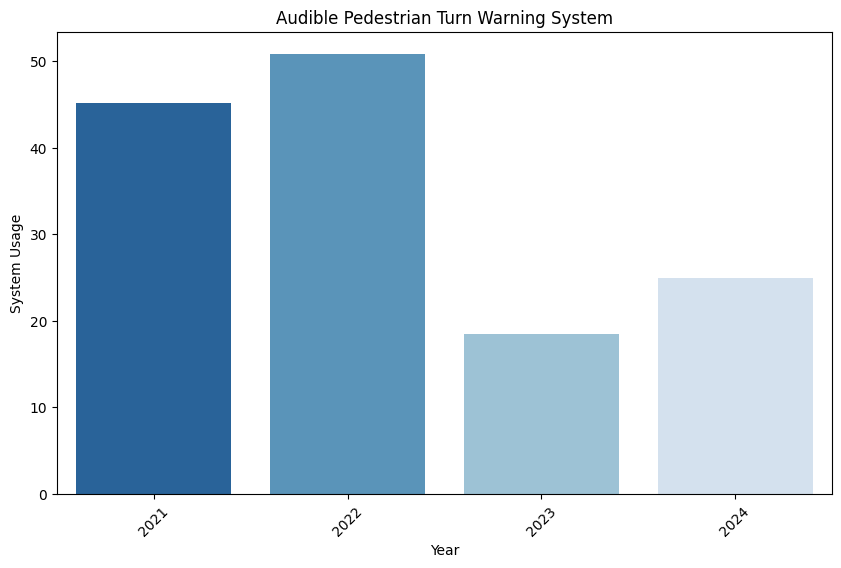

In [31]:
# Extracting year from 'Month' and calculating the average 'Value' by year
df6['Year'] = df6['Month'].dt.year
yearly_avg = df6.groupby('Year')['Value'].mean().reset_index()

# Plotting the bar chart - Yearly
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Blues_r')
plt.title('Audible Pedestrian Turn Warning System')
plt.xlabel('Year')
plt.ylabel('System Usage')
plt.xticks(rotation=45)
plt.show()

**Analysis:**

**2021:** The year starts with an average value of 45.2 units, indicating a moderate level of activity in implementing the audible pedestrian turn warning system across the bus fleet. This suggests the initial phase of rolling out the safety feature aimed at reducing accidents involving pedestrians.

**2022:** There is an increase in the average to 50.83 units, showing an acceleration in efforts to install or activate the audible warning system. This uptick could reflect a scaling up of safety measures or the continuation of an established plan to equip more buses with this technology.

**2023:** A significant decrease to an average of 18.5 units marks a **notable reduction in activity** concerning the audible pedestrian warning system. This drop could indicate that the majority of the intended installations were completed in the previous years, or it may reflect a shift in focus towards other safety measures or operational priorities.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/889244957.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Blues_r')


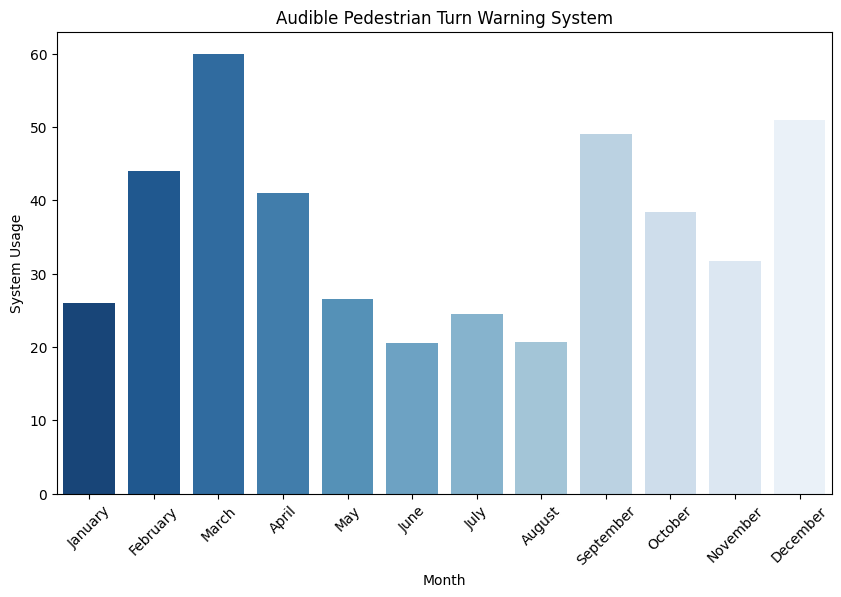

In [32]:
# Extracting year from 'Month' and calculating the average 'Value' by month
df6['Month#'] = df6['Month'].dt.month
monthly_avg = df6.groupby('Month#')['Value'].mean().reset_index()

# Apply the mapping to the 'Month' column to create a new 'Month_Name' column
monthly_avg['Month_Name'] = monthly_avg['Month#'].map(month_mapping)

# Plotting the bar chart - Monthly
plt.figure(figsize=(10, 6))
sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Blues_r')
plt.title('Audible Pedestrian Turn Warning System')
plt.xlabel('Month')
plt.ylabel('System Usage')
plt.xticks(rotation=45)
plt.show()

**Analysis:**

**High Activity Periods:** March stands out with the highest monthly value of 60.000 units, indicating a peak in activity. This suggests a strategic push or a seasonal initiative to enhance pedestrian safety measures during this month. February follows closely behind, demonstrating continued efforts with a value of 44.000 units.

**Lower Activity in Mid to Late Year:** From June onwards, there's a noticeable decline, with the lowest value observed in August (20.666667 units). This period may reflect a slowdown in installations, possibly due to operational constraints, budget cycles, or the completion of targeted installations.

**Slight Increases in Late Year:** There’s a minor uptick in September (49.000 units) and October (38.333333 units), followed by a stabilization in activity towards the end of the year, indicating a possible effort to wrap up pending installations before the year ends or adjustments in project timelines.

In [33]:
monthly_avg

,Month#,Value,Month_Name
0,1,26.000000,January
1,2,44.000000,February
2,3,60.000000,March
3,4,41.000000,April
4,5,26.500000,May
5,6,20.500000,June
6,7,24.500000,July
7,8,20.666667,August
8,9,49.000000,September
9,10,38.333333,October


### Vision Zero Employee Training

Indicates the number of training sessions or participants in training programs aimed at eliminating traffic deaths and severe injuries.

In [34]:
# Vision Zero Employee Training

df7 = metric_dfs['Vision Zero Employee Training']

df7.head()

,Month,Department,Metric,Value
144,08/01/2021,Bus,Vision Zero Employee Training,443.0
155,09/01/2021,Bus,Vision Zero Employee Training,541.0
166,10/01/2021,Bus,Vision Zero Employee Training,484.0
177,11/01/2021,Bus,Vision Zero Employee Training,442.0
188,12/01/2021,Bus,Vision Zero Employee Training,470.0


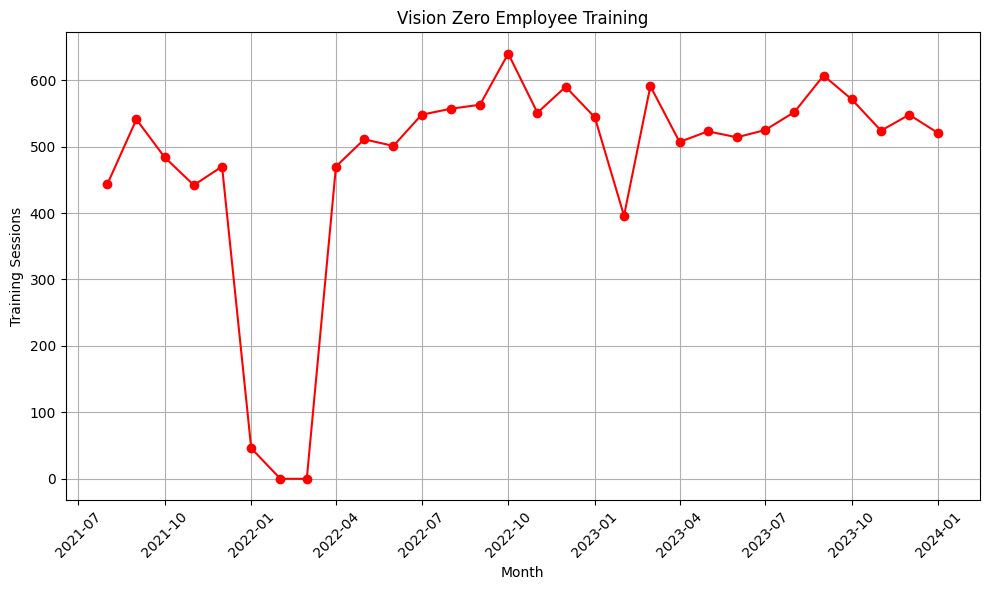

In [35]:
# Convert 'Month' column to datetime format
df7 = df7.copy()
df7['Month'] = pd.to_datetime(df7['Month'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df7['Month'], df7['Value'], marker='o', linestyle='-', color='red')
plt.title('Vision Zero Employee Training')
plt.xlabel('Month')
plt.ylabel('Training Sessions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis:**

The overall trend for "Vision Zero Employee Training" from August 2021 to January 2024 indicates an active engagement in employee safety training, with a significant increase in training sessions or participants as the program progresses. **After a high level of activity in late 2021, there's a noticeable dip in January 2022, dropping to 46 sessions, followed by two months with no reported training.** Training activity resumes in April 2022 and shows a consistent upward trend, reaching peak values in September 2023 (607 sessions). This suggests a revitalized commitment to the Vision Zero initiative, aimed at eliminating all traffic fatalities and severe injuries, with increased efforts in training employees on safety practices. The slight fluctuation in numbers, particularly the drop at the beginning of 2022, could be due to operational adjustments or reporting practices, but the general upward trend underscores a sustained focus on enhancing safety through employee training.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/63450390.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Reds')


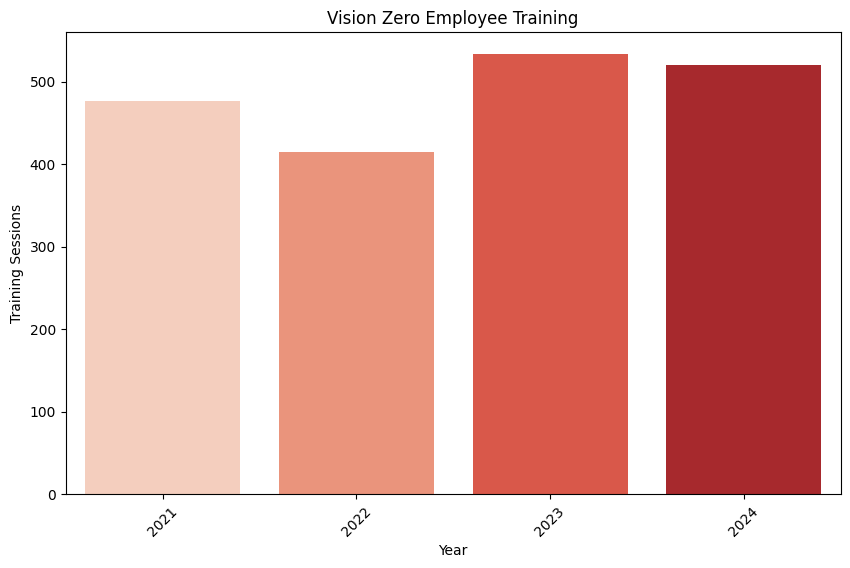

In [36]:
# Extracting year from 'Month' and calculating the average 'Value' by year
df7['Year'] = df7['Month'].dt.year
yearly_avg = df7.groupby('Year')['Value'].mean().reset_index()

# Plotting the bar chart - Yearly
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Reds')
plt.title('Vision Zero Employee Training')
plt.xlabel('Year')
plt.ylabel('Training Sessions')
plt.xticks(rotation=45)
plt.show()

**Analysis:**

**2021:** The program started with a robust engagement, recording an average of 476 training sessions or participants. This indicates a strong initial effort towards implementing the Vision Zero safety principles within the bus operations.

**2022:** There's a slight decrease to an average of 414.75 sessions or participants. This reduction might reflect adjustments in training scope, operational challenges, or shifts in focus within the broader safety initiatives.

**2023:** The average significantly increases to 533.5, indicating a renewed emphasis on safety training. This uptick suggests either an expansion of the training program, increased participation, or perhaps a response to evolving safety needs and priorities.

The overall trend shows a commitment to continuous improvement in employee safety training under the Vision Zero initiative, with a noticeable resurgence in focus and resources dedicated to this area in 2023.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/2416088248.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Reds')


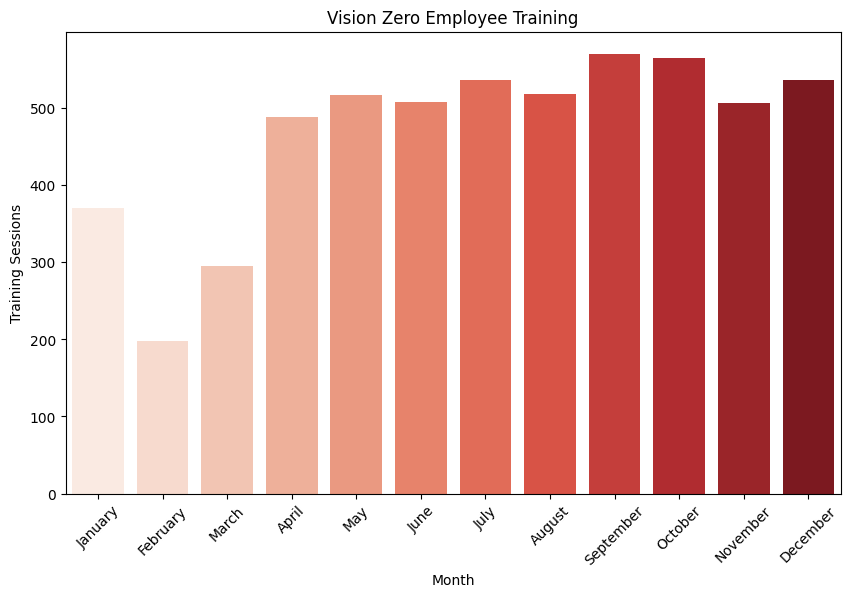

In [37]:
# Extracting year from 'Month' and calculating the average 'Value' by month
df7['Month#'] = df7['Month'].dt.month
monthly_avg = df7.groupby('Month#')['Value'].mean().reset_index()

# Apply the mapping to the 'Month' column to create a new 'Month_Name' column
monthly_avg['Month_Name'] = monthly_avg['Month#'].map(month_mapping)

# Plotting the bar chart - Monthly
plt.figure(figsize=(10, 6))
sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Reds')
plt.title('Vision Zero Employee Training')
plt.xlabel('Month')
plt.ylabel('Training Sessions')
plt.xticks(rotation=45)
plt.show()

**Analysis:**

**Start of the Year:** January begins with a lower average of 370 sessions, suggesting a slower start to training initiatives post-holiday season.

**Significant Dip in February:** February sees a notable dip to 198 sessions, marking the lowest engagement level across the year. This could be due to seasonal factors, operational planning, or budget cycles.

**Steady Increase in Spring to Early Summer:** From March onwards, there's a significant increase in activity, peaking in September with an average of 570.333 sessions. This period may reflect strategic scheduling to ramp up training efforts as operational demands allow or in response to safety performance analysis.

**High Engagement in Mid to Late Year:** The period from April to October shows consistently high averages, with April (488.5), May (517), and October (565) highlighting intensified training efforts. This could be aimed at reinforcing safety practices ahead of and during the busier summer months.

**Stabilization Towards Year-End:** The averages in the latter part of the year, particularly July (536.5), August (517.333), and December (536), indicate sustained engagement in training. This suggests an ongoing commitment to maintaining high safety standards through continuous education and training.

### Joint Track Safety Audits - Actual Count

The actual number of safety audits conducted on the tracks to ensure compliance with safety standards.

In [38]:
# Joint Track Safety Audits - Actual Count

df8 = metric_dfs['Joint Track Safety Audits - Actual Count']

df8.head()

,Month,Department,Metric,Value
147,08/01/2021,Subway,Joint Track Safety Audits - Actual Count,28.0
158,09/01/2021,Subway,Joint Track Safety Audits - Actual Count,26.0
169,10/01/2021,Subway,Joint Track Safety Audits - Actual Count,23.0
180,11/01/2021,Subway,Joint Track Safety Audits - Actual Count,20.0
191,12/01/2021,Subway,Joint Track Safety Audits - Actual Count,26.0


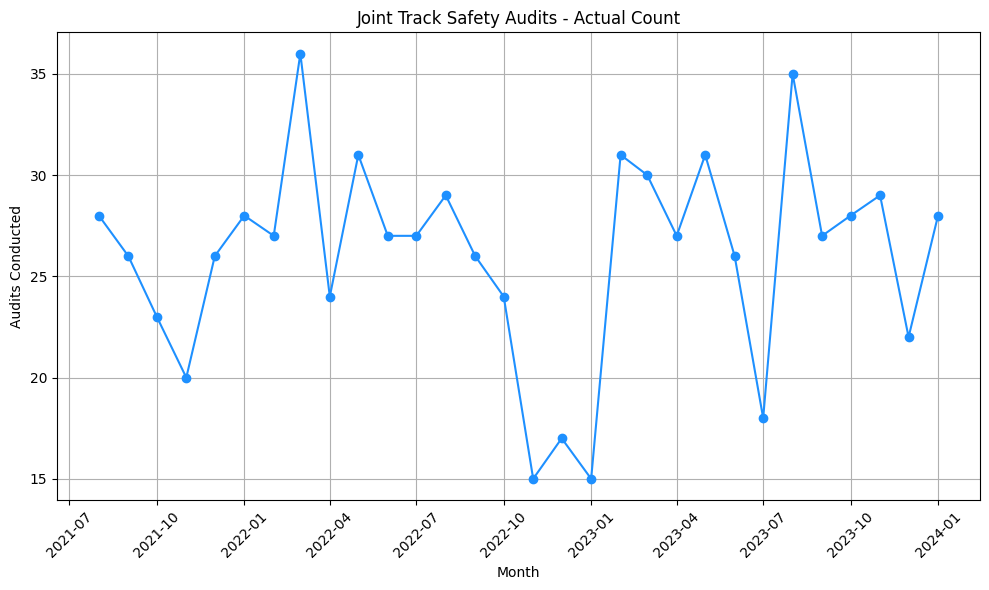

In [39]:
# Convert 'Month' column to datetime format
df8 = df8.copy()
df8['Month'] = pd.to_datetime(df8['Month'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df8['Month'], df8['Value'], marker='o', linestyle='-', color='dodgerblue')
plt.title('Joint Track Safety Audits - Actual Count')
plt.xlabel('Month')
plt.ylabel('Audits Conducted')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis:**

The "Joint Track Safety Audits - Actual Count" data from August 2021 to January 2024 for the subway indicates a consistent effort in conducting safety audits across the subway system. The number of audits performed each month generally fluctuates within a range, with a peak at 36 audits in March 2022, suggesting a possible intensified focus on track safety at that time. **Notably, there's a decrease in audits in late 2022, particularly in November and December, followed by a recovery in early 2023.** This pattern could reflect seasonal adjustments, operational priorities, or responses to specific safety concerns. Overall, the trend shows a sustained commitment to conducting regular safety audits as part of the ongoing efforts to ensure the safety and reliability of subway operations.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/1314724102.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Blues')


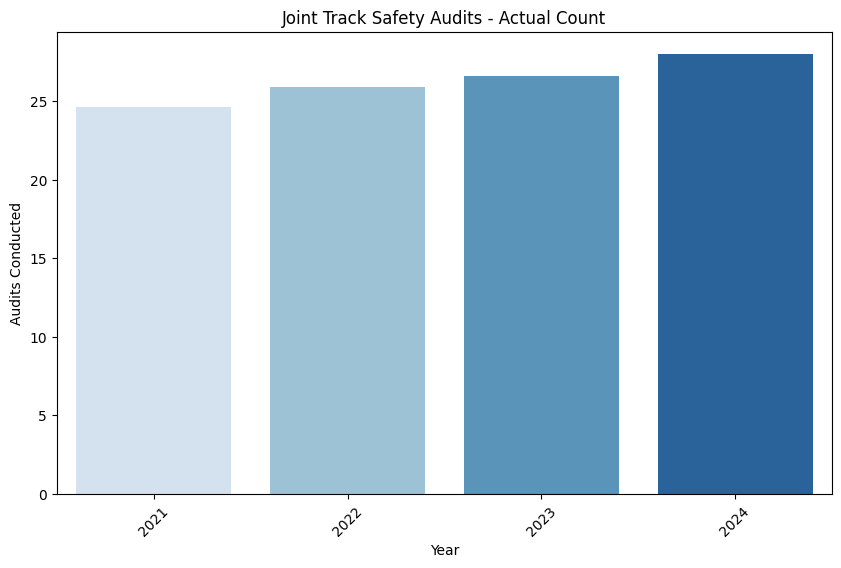

In [40]:
# Extracting year from 'Month' and calculating the average 'Value' by year
df8['Year'] = df8['Month'].dt.year
yearly_avg = df8.groupby('Year')['Value'].mean().reset_index()

# Plotting the bar chart - Yearly
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Blues')
plt.title('Joint Track Safety Audits - Actual Count')
plt.xlabel('Year')
plt.ylabel('Audits Conducted')
plt.xticks(rotation=45)
plt.show()

**Analysis:**

The data for "Joint Track Safety Audits - Actual Count" from 2021 to 2023 shows a slight but consistent increase in the average number of audits conducted annually. Starting with an average of 24.6 audits in 2021, there's a gradual rise to 25.92 in 2022 and further to 26.58 in 2023. This trend suggests a steady commitment to enhancing subway safety through regular audits, reflecting ongoing efforts to maintain and improve track safety standards over time.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/4065296788.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Blues_r')


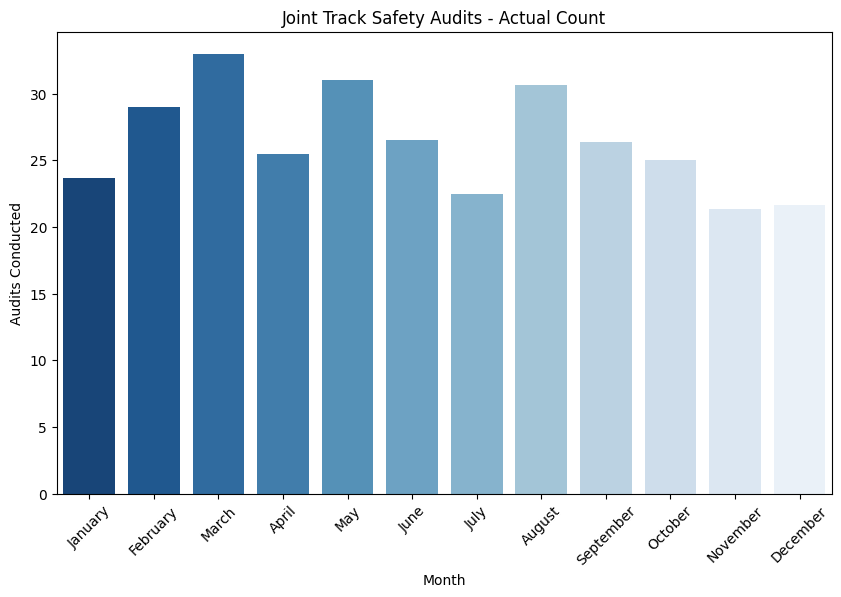

In [41]:
# Extracting year from 'Month' and calculating the average 'Value' by month
df8['Month#'] = df8['Month'].dt.month
monthly_avg = df8.groupby('Month#')['Value'].mean().reset_index()

# Apply the mapping to the 'Month' column to create a new 'Month_Name' column
monthly_avg['Month_Name'] = monthly_avg['Month#'].map(month_mapping)

# Plotting the bar chart - Monthly
plt.figure(figsize=(10, 6))
sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Blues_r')
plt.title('Joint Track Safety Audits - Actual Count')
plt.xlabel('Month')
plt.ylabel('Audits Conducted')
plt.xticks(rotation=45)
plt.show()

**Analysis:**

**Lower Activity in Early Year:** February has the lowest average value (198), suggesting a decrease in activity or lower outcomes for this period.

**Peak Activity in Mid to Late Year:** The highest averages are observed from April to September, peaking in September (570.33), which indicates increased activity or improved outcomes during these months.

**Stabilization Towards Year-End:** After the peak, there's a slight decrease but still high values in October (565) and December (536), suggesting a stabilization of activity or outcomes towards the end of the year.

Overall, this trend may reflect seasonal influences, operational strategies, or project cycles affecting the metric, with a notable increase in the middle of the year and a stabilization towards the end.

### Joint Track Safety Audits - Compliance Rate

The percentage of those audits that meet or exceed the established safety standards.

In [42]:
# Joint Track Safety Audits - Compliance Rate

df9 = metric_dfs['Joint Track Safety Audits - Compliance Rate']

df9.head()

,Month,Department,Metric,Value
148,08/01/2021,Subway,Joint Track Safety Audits - Compliance Rate,1.000
159,09/01/2021,Subway,Joint Track Safety Audits - Compliance Rate,0.977
170,10/01/2021,Subway,Joint Track Safety Audits - Compliance Rate,0.983
181,11/01/2021,Subway,Joint Track Safety Audits - Compliance Rate,0.993
192,12/01/2021,Subway,Joint Track Safety Audits - Compliance Rate,0.998


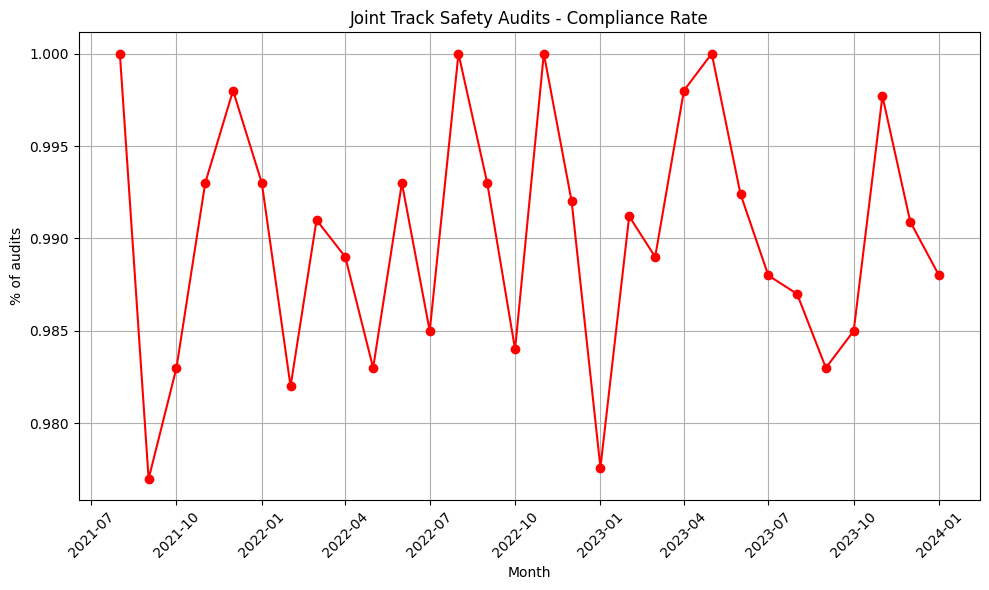

In [43]:
# Convert 'Month' column to datetime format
df9 = df9.copy()
df9['Month'] = pd.to_datetime(df9['Month'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df9['Month'], df9['Value'], marker='o', linestyle='-', color='red')
plt.title('Joint Track Safety Audits - Compliance Rate')
plt.xlabel('Month')
plt.ylabel('% of audits')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis:**

The "Joint Track Safety Audits - Compliance Rate" data from August 2021 to January 2024 demonstrates a **consistently high compliance rate, hovering near or at perfection (100%) for several months**. This indicates a strong adherence to safety standards and protocols during the audits. The slight variations in compliance rates, with occasional dips just below 100%, suggest areas for minor improvements but overall reflect a commendable level of safety performance within the subway system. 

The trend underscores the effectiveness of the safety measures in place and the commitment to maintaining high safety standards through regular audits. The few fluctuations seen are minimal, indicating ongoing efforts to address and rectify any identified issues promptly.

### Continuous Welded Rail Initiative (# Track Feet)

Measures the length of rail tracks that have been converted to continuous welded rail to enhance safety and reduce maintenance.

In [44]:
# Continuous Welded Rail Initiative (# Track Feet)

df10 = metric_dfs['Continuous Welded Rail Initiative (# Track Feet)']

df10.head()

,Month,Department,Metric,Value
149,08/01/2021,Subway,Continuous Welded Rail Initiative (# Track Feet),4530.0
160,09/01/2021,Subway,Continuous Welded Rail Initiative (# Track Feet),345.0
171,10/01/2021,Subway,Continuous Welded Rail Initiative (# Track Feet),2216.0
182,11/01/2021,Subway,Continuous Welded Rail Initiative (# Track Feet),3805.0
193,12/01/2021,Subway,Continuous Welded Rail Initiative (# Track Feet),1803.0


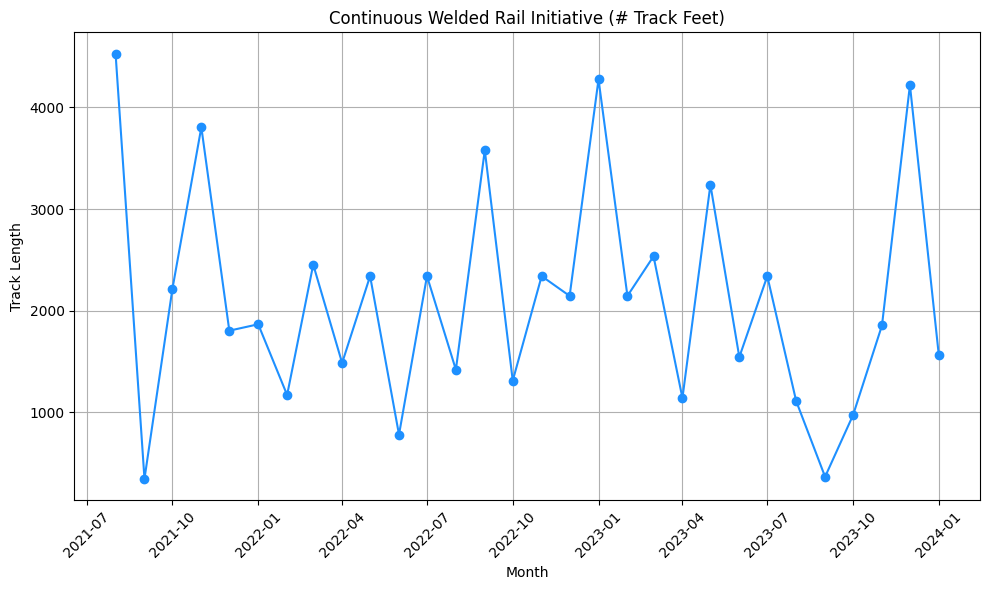

In [45]:
# Convert 'Month' column to datetime format
df10 = df10.copy()
df10['Month'] = pd.to_datetime(df10['Month'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df10['Month'], df10['Value'], marker='o', linestyle='-', color='dodgerblue')
plt.title('Continuous Welded Rail Initiative (# Track Feet)')
plt.xlabel('Month')
plt.ylabel('Track Length')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis:**

The data presents **significant fluctuations** in the amount of rail installed each month. For instance, a peak of 4,530 feet in August 2021 contrasts sharply with a low of 345 feet in September 2021. This variability might reflect the project-based nature of infrastructure improvements, where work might be concentrated in specific areas or during certain periods based on operational priorities and logistical considerations.

The overall trend seems to show an ambitious effort in updating and improving the subway's rail infrastructure, with the initiative's scope possibly expanding as the project progresses.

Continuous welded rail (CWR) offers several benefits, including reduced maintenance needs, smoother rides, and enhanced safety by minimizing the risks associated with rail joints.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/3525269569.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Blues_r')


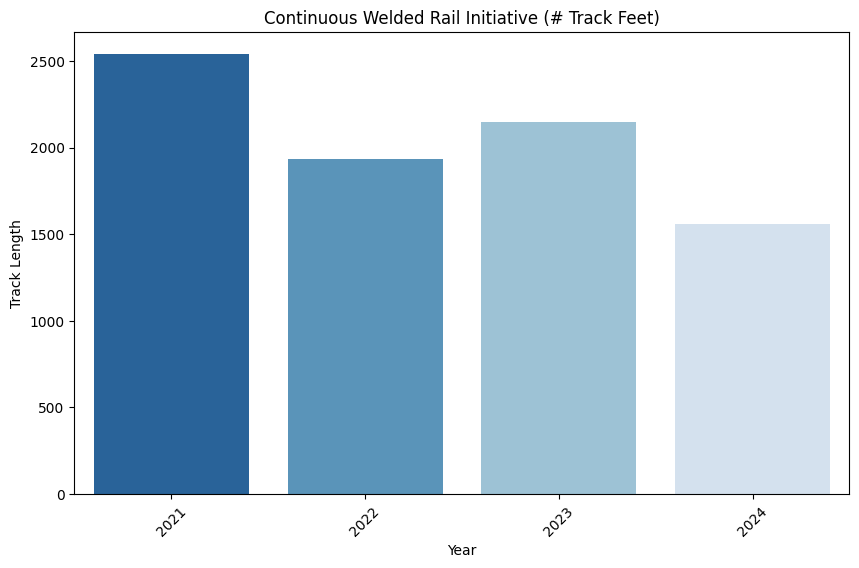

In [46]:
# Extracting year from 'Month' and calculating the average 'Value' by year
df10 = df10.copy()
df10['Year'] = df10['Month'].dt.year
yearly_avg = df10.groupby('Year')['Value'].mean().reset_index()

# Plotting the bar chart - Yearly
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Blues_r')
plt.title('Continuous Welded Rail Initiative (# Track Feet)')
plt.xlabel('Year')
plt.ylabel('Track Length')
plt.xticks(rotation=45)
plt.show()

**Analysis:**

**2021:** The average installation was 2,418.4 feet. This suggests a solid start to the initiative, with a substantial amount of continuous welded rail being laid down.

**2022:** The average slightly decreased to 2,343.5 feet. This slight decline could reflect various factors, including project completion in easier or more accessible areas, leading to more complex and time-consuming sections.

**2023:** There's a significant increase in the average installation to 4,103.17 feet. This remarkable jump indicates an acceleration in the initiative's efforts, possibly due to increased funding, improved project efficiency, or a concerted push to complete the initiative's objectives.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/2560327324.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Blues_r')


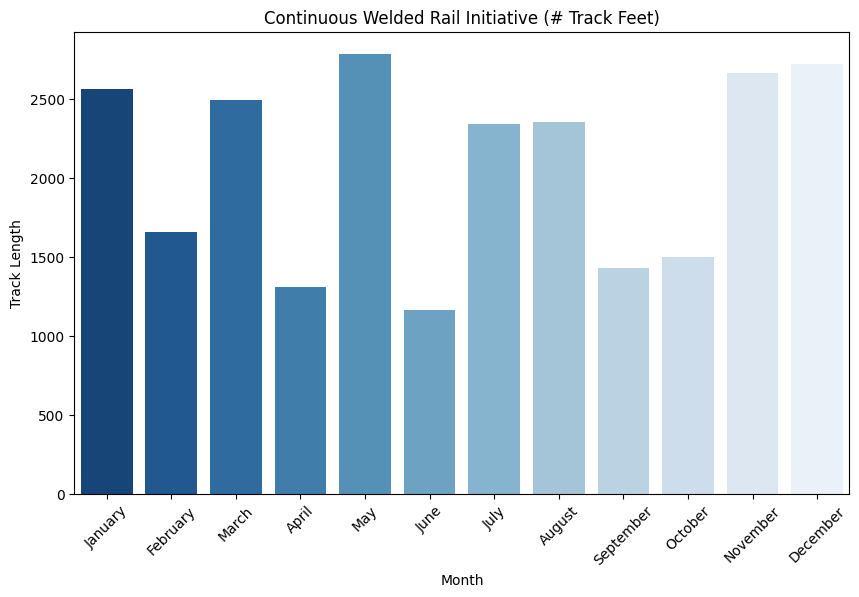

In [47]:
# Extracting year from 'Month' and calculating the average 'Value' by month
df10['Month#'] = df10['Month'].dt.month
monthly_avg = df10.groupby('Month#')['Value'].mean().reset_index()

# Apply the mapping to the 'Month' column to create a new 'Month_Name' column
monthly_avg['Month_Name'] = monthly_avg['Month#'].map(month_mapping)

# Plotting the bar chart - Monthly
plt.figure(figsize=(10, 6))
sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Blues_r')
plt.title('Continuous Welded Rail Initiative (# Track Feet)')
plt.xlabel('Month')
plt.ylabel('Track Length')
plt.xticks(rotation=45)
plt.show()

**Average:**

**Variability Across Months:** The monthly averages show significant variability, indicating that the installation efforts might be influenced by factors such as weather conditions, project planning phases, or available resources. For instance, February (3,494), March (3,657.5), and December (3,671.333333) show higher averages, which might reflect strategic planning to undertake more extensive work during specific periods.

**High Productivity Periods:** The highest monthly averages are seen in June (3,969.5), March (3,657.5), and December (3,671.333333), suggesting that these months may offer more favorable conditions for infrastructure projects, or they align with project schedules for significant construction milestones.

**Lower Activity in Early Fall:** September shows the lowest monthly average (2,234.666667), which might reflect a transitional period in project activity or other operational priorities that limit the scope of work during this time.

### Friction Pad Installation

Tracks the progress in installing friction pads, which are used to reduce noise and wear on the tracks, contributing to a safer and more durable railway infrastructure.

In [48]:
# Continuous Welded Rail Initiative (# Track Feet)

df11 = metric_dfs['Friction Pad Installation']

df11.head()

,Month,Department,Metric,Value
150,08/01/2021,Subway,Friction Pad Installation,2079.0
161,09/01/2021,Subway,Friction Pad Installation,2425.0
172,10/01/2021,Subway,Friction Pad Installation,2464.0
183,11/01/2021,Subway,Friction Pad Installation,2836.0
194,12/01/2021,Subway,Friction Pad Installation,2288.0


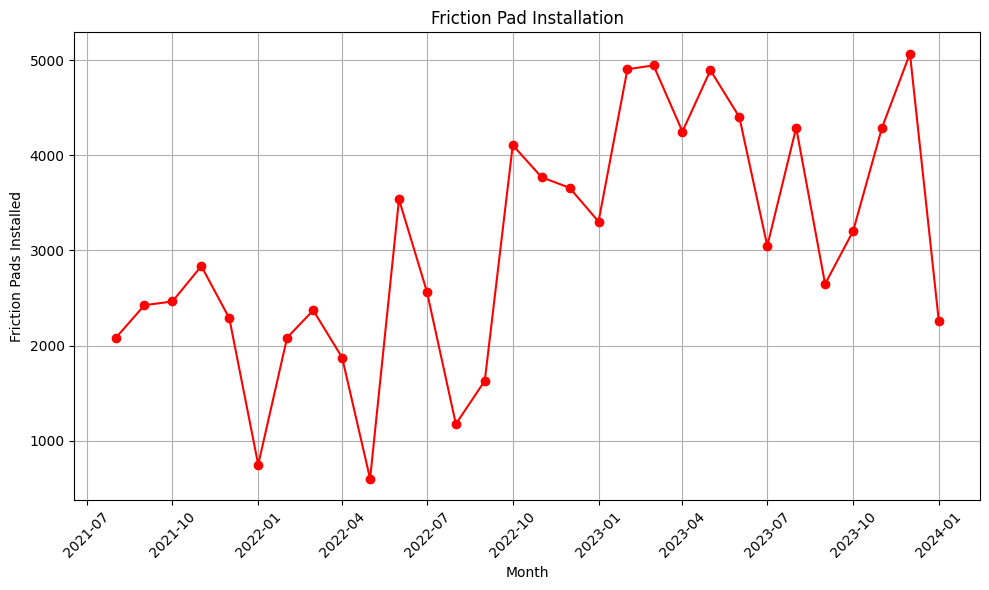

In [49]:
# Convert 'Month' column to datetime format
df11 = df11.copy()
df11['Month'] = pd.to_datetime(df11['Month'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df11['Month'], df11['Value'], marker='o', linestyle='-', color='red')
plt.title('Friction Pad Installation')
plt.xlabel('Month')
plt.ylabel('Friction Pads Installed')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis:**

**Trend:** There is a general upward trend in the number of friction pad installations, especially notable from the beginning of 2022 onwards. This indicates a focused effort on enhancing subway safety and infrastructure during this period.

**Variability:** The data shows significant variability in the monthly installation counts, with numbers ranging from as low as 601 in May 2022 to as high as 5068 in December 2023. This variation could reflect project scheduling, resource availability, or specific operational priorities at different times.

**Peak Installations:** The highest number of installations occurs in December 2023, with 5068 friction pads installed, suggesting a significant push or culmination of efforts towards the year's end.

**Notable Decreases:** After a peak, there is often a notable decrease in installations, such as in January 2022 (750 installations) following December 2021 (2288 installations) and again in January 2024 (2256 installations) following December 2023 (5068 installations). These drops may indicate project cycles or budgeting cycles influencing the installation rates.

**Overall Progress:** The overall increasing trend, particularly the spike in installations towards the end of 2023 and early 2024, suggests a ramping up of efforts to improve subway infrastructure safety, potentially in response to identified needs or as part of a larger safety initiative.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/2740587191.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Reds')


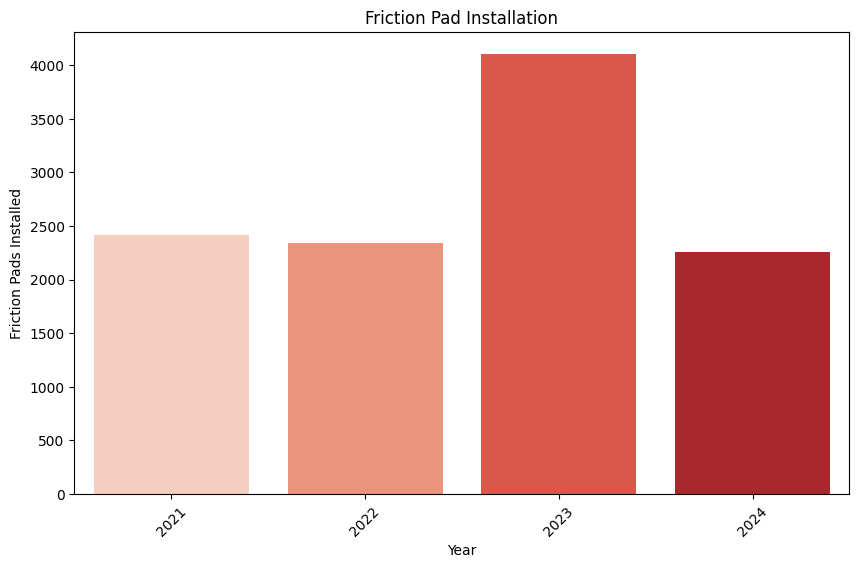

In [50]:
# Extracting year from 'Month' and calculating the average 'Value' by year
df11['Year'] = df11['Month'].dt.year
yearly_avg = df11.groupby('Year')['Value'].mean().reset_index()

# Plotting the bar chart - Yearly
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Value', data=yearly_avg, palette='Reds')
plt.title('Friction Pad Installation')
plt.xlabel('Year')
plt.ylabel('Friction Pads Installed')
plt.xticks(rotation=45)
plt.show()

**Analysis:**

**Project Expansion in 2023:** The substantial increase in the average number of installations in 2023 suggests a significant ramp-up in efforts or an expansion of the project's scope. This could indicate heightened attention to improving subway safety and operational efficiency or the culmination of planning phases into more aggressive implementation.

/var/folders/r7/yv995srd6y1672yqt5jjqq9r0000gn/T/ipykernel_42429/2395977000.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Reds')


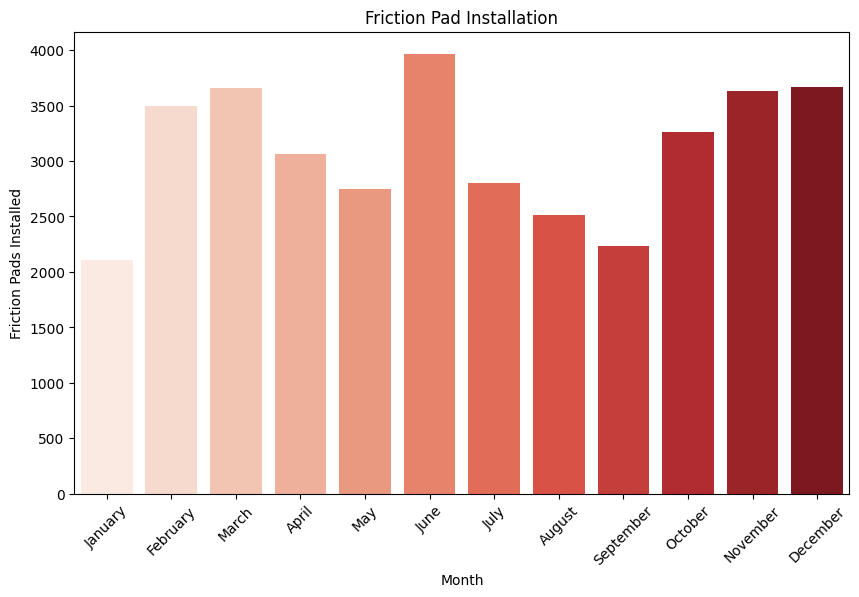

In [51]:
# Extracting year from 'Month' and calculating the average 'Value' by month
df11['Month#'] = df11['Month'].dt.month
monthly_avg = df11.groupby('Month#')['Value'].mean().reset_index()

# Apply the mapping to the 'Month' column to create a new 'Month_Name' column
monthly_avg['Month_Name'] = monthly_avg['Month#'].map(month_mapping)

# Plotting the bar chart - Monthly
plt.figure(figsize=(10, 6))
sns.barplot(x='Month_Name', y='Value', data=monthly_avg, palette='Reds')
plt.title('Friction Pad Installation')
plt.xlabel('Month')
plt.ylabel('Friction Pads Installed')
plt.xticks(rotation=45)
plt.show()

**Analysis:**
  
The monthly averages reveal that installation efforts are not evenly spread throughout the year but peak during certain months, which could be strategic to minimize operational disruptions or take advantage of specific seasonal conditions for maintenance activities.
The substantial efforts in later months like November and December, followed by a slight dip in January, suggest a pattern of wrapping up significant work towards the year's end, possibly to align with fiscal year budgets or weather-related planning.